In [12]:
import os
import random 

import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from img_generator import build_train_test_df, DataGenerator2D

In [3]:
data_path_source_dir = os.path.join('ml4h_proj1_colon_cancer_ct', 'ml4h_proj1_colon_cancer_ct')

# Let's check the behavior of the augmentation operations of the generator

In [4]:
random.seed(123)
np.random.seed(123)

Let's choose a set of images that have cancer labeled in them 

In [5]:
tr_df, x_ts_df = build_train_test_df(data_path_source_dir)

In [6]:
cancer_pixels_df = pd.read_pickle('cancer_pixels_df')
cancer_pixels_df.reset_index(inplace=True)

In [7]:
cancer_pixels_df['index'] = cancer_pixels_df.image_name.map(lambda str_: str_.split('.nii.gz')[0].split('colon_')[1])

In [8]:
tr_df_only_cancer = cancer_pixels_df.set_index(['index', 'depth_i'])[['cancer_pixel_area']].join(tr_df, how='inner')

In [9]:
tr_df_only_cancer

cancer_pixel_area  \
index depth_i                      
001   51                   841.0   
      52                   646.0   
      53                   296.0   
005   44                   278.0   
      50                   270.0   
...                          ...   
169   139                  245.0   
      140                  228.0   
      141                  198.0   
      142                  153.0   
      143                  131.0   

                                                   x_tr_img_path  depth  \
index depth_i                                                             
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
...                                                          ...    ...   
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   

                                                   y_tr_img_path  
index depth_i                                                     
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
...                                                          ...  
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  

[1034 rows x 4 columns]

Let's try it with no augmentations or resizing

In [43]:
tr_gen_no_mod = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=1, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=None, horizontal_flip=False, vertical_flip=False)

In [44]:
tr_df_only_cancer.iloc[0:]#['x_tr_img_path']

cancer_pixel_area  \
index depth_i                      
001   51                   841.0   
      52                   646.0   
      53                   296.0   
005   44                   278.0   
      50                   270.0   
...                          ...   
169   139                  245.0   
      140                  228.0   
      141                  198.0   
      142                  153.0   
      143                  131.0   

                                                   x_tr_img_path  depth  \
index depth_i                                                             
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
...                                                          ...    ...   
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   

                                                   y_tr_img_path  
index depth_i                                                     
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
...                                                          ...  
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  

[1034 rows x 4 columns]

In [39]:
img_path = tr_df_only_cancer.iloc[0:1,]['x_tr_img_path'][0]
label_path = tr_df_only_cancer.iloc[0:1,]['y_tr_img_path'][0]

In [40]:
full_img_array = nib.load(img_path).get_data()
full_label_array = nib.load(label_path).get_data()

c:\users\juan diego\documents\ondemna\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
c:\users\juan diego\documents\ondemna\venv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


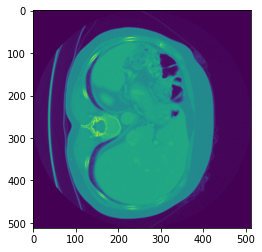

In [41]:
plt.imshow(full_img_array[:, :, 51])

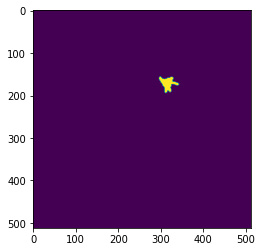

In [42]:
plt.imshow(full_label_array[:, :, 51])

In [34]:
full_img_array.shape

(512, 512, 60)

X: (1, 512, 512)
y: (1, 512, 512)


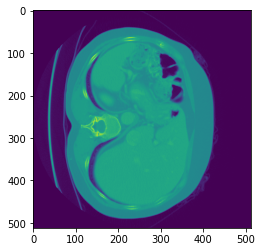

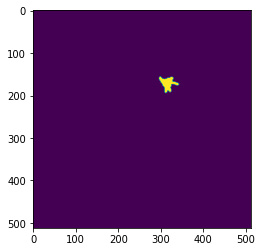

In [45]:
for X, y in (tr_gen_no_mod):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Vertical flips

In [12]:
tr_vert = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=None, horizontal_flip=None, vertical_flip=True)

X: (4, 512, 512)
y: (4, 512, 512)


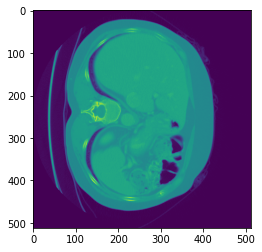

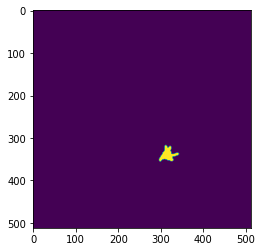

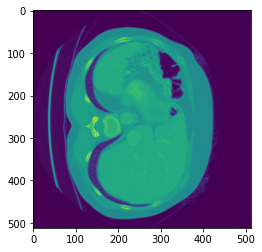

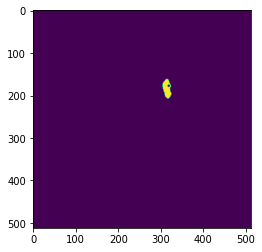

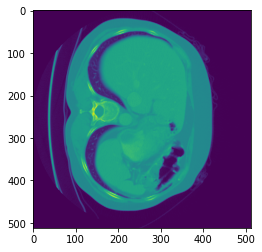

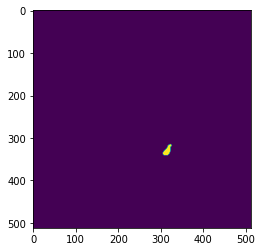

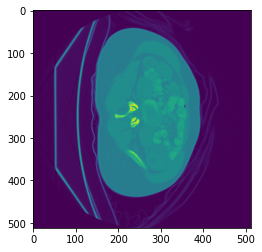

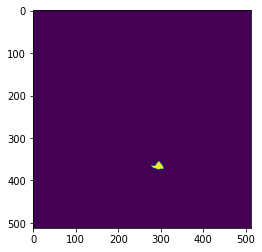

In [13]:
for X, y in (tr_vert):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Horizontal flips

In [14]:
tr_hor = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=None, horizontal_flip=True, vertical_flip=False)

X: (4, 512, 512)
y: (4, 512, 512)


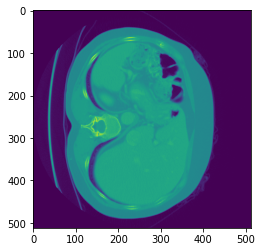

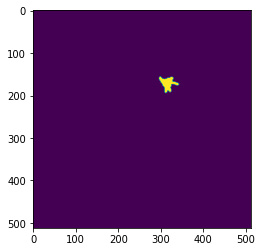

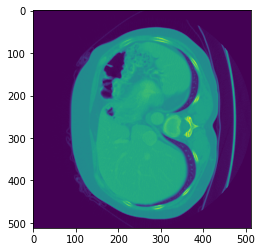

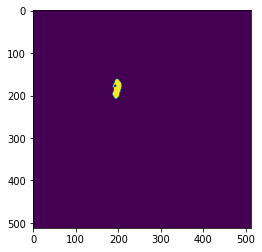

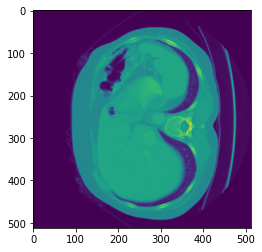

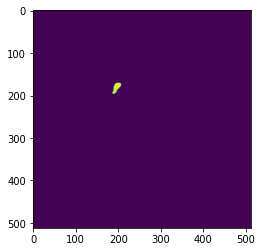

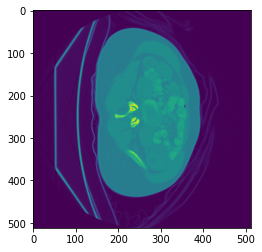

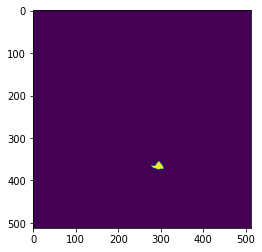

In [15]:
for X, y in (tr_hor):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Rotate

In [16]:
tr_rot = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                                resize_dim=None,
                                rotate_range=30, horizontal_flip=False, vertical_flip=False)

X: (4, 512, 512)
y: (4, 512, 512)


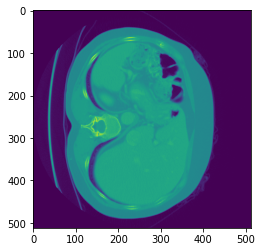

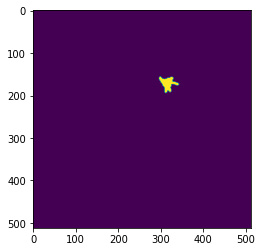

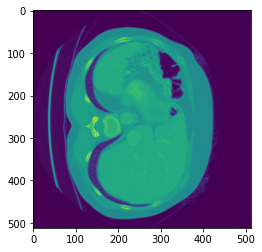

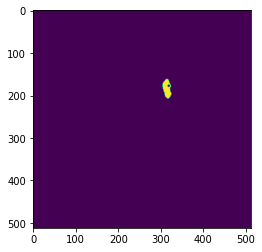

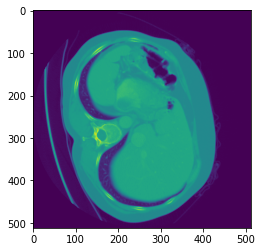

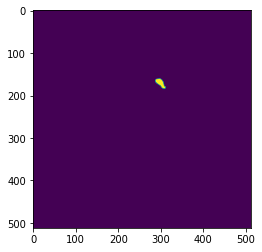

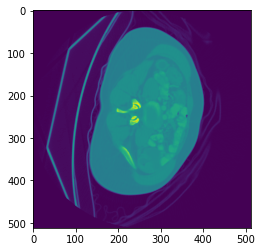

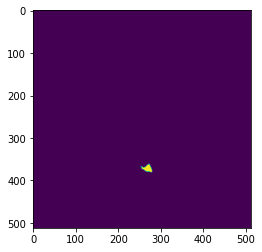

In [17]:
for X, y in (tr_rot):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Resize

In [18]:
tr_resize = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                            resize_dim=(128, 128),
                            rotate_range=None, horizontal_flip=False, vertical_flip=False)

X: (4, 128, 128)
y: (4, 128, 128)


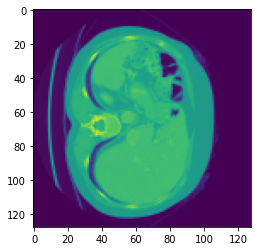

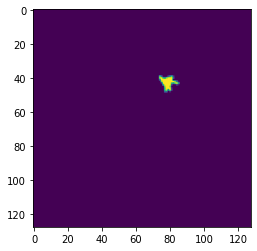

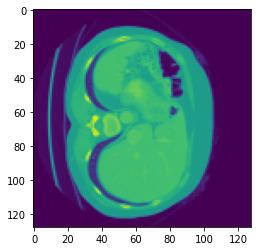

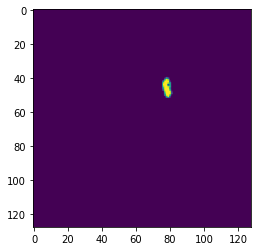

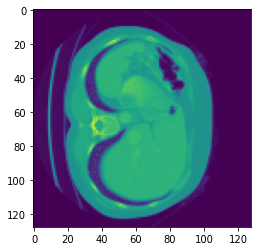

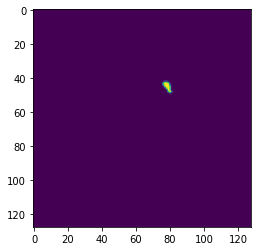

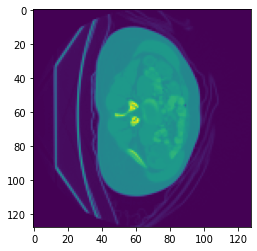

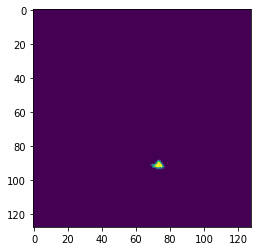

In [19]:
for X, y in (tr_resize):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Random zooming

In [20]:
tr_resize = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                            resize_dim=None,
                            rotate_range=None, horizontal_flip=False, vertical_flip=False, random_crop=(0.8, 0.9))

X: (4, 512, 512)
y: (4, 512, 512)


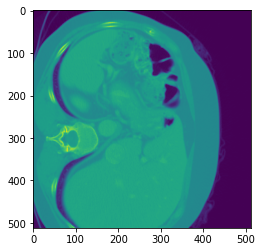

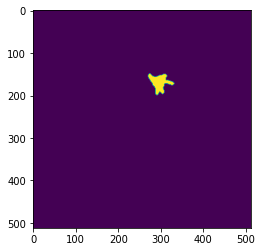

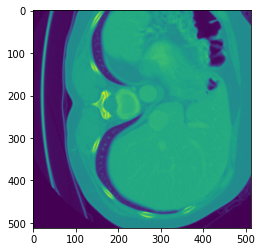

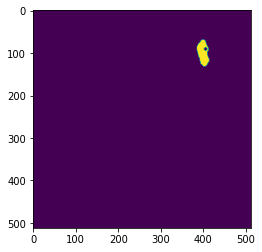

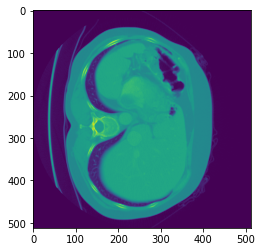

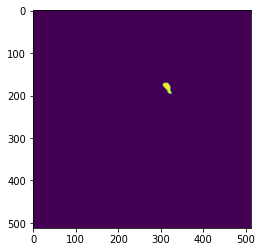

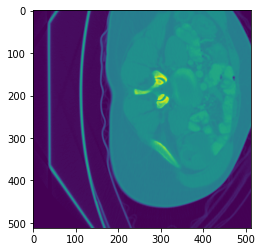

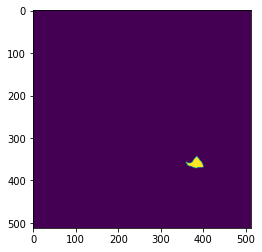

In [21]:
for X, y in (tr_resize):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Shearing

In [22]:
tr_resize = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                            resize_dim=None,
                            rotate_range=None, horizontal_flip=False, vertical_flip=False, random_crop=None,
                            shearing=((0.1, 0.3), (0., 0.0)) #Range values from https://europepmc.org/article/med/29854165
                           )

X: (4, 512, 512)
y: (4, 512, 512)


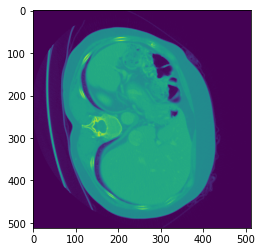

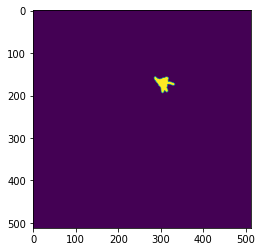

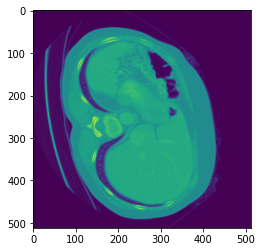

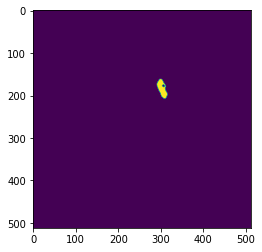

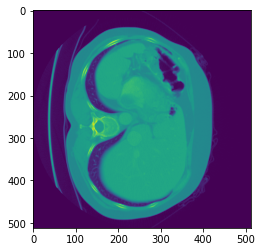

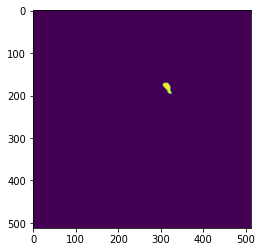

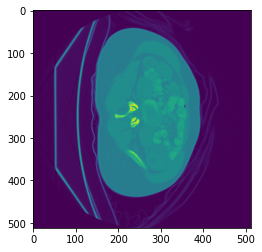

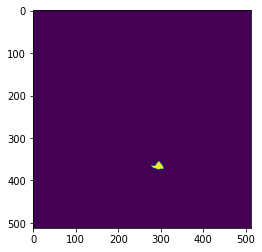

In [23]:
for X, y in (tr_resize):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break

##### Gausian Blur

In [24]:
tr_resize = DataGenerator2D(df=tr_df_only_cancer.head(20), x_col='x_tr_img_path', y_col='y_tr_img_path', batch_size=4, num_classes=None, shuffle=False, 
                            resize_dim=None,
                            rotate_range=None, horizontal_flip=False, vertical_flip=False, random_crop=None,
                            shearing=None, gaussian_blur=(0.3162, 0.9487) #Range values from https://europepmc.org/article/med/29854165
                           )

X: (4, 512, 512)
y: (4, 512, 512)


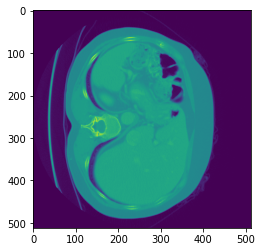

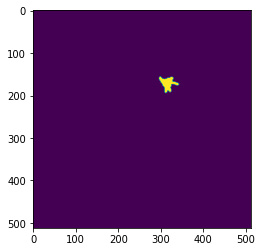

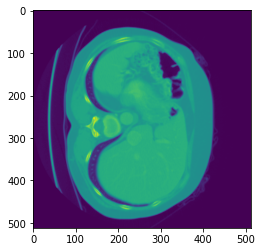

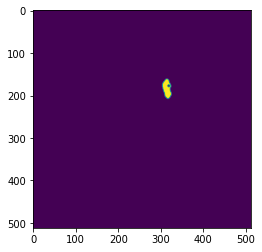

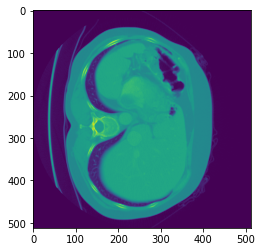

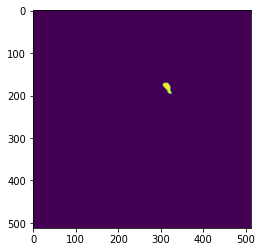

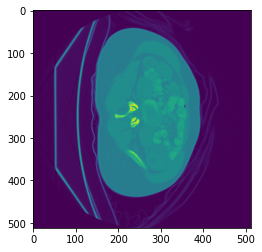

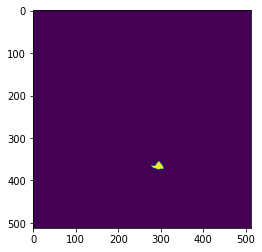

In [25]:
for X, y in (tr_resize):
    print(f'X: {X.shape}')
    print(f'y: {y.shape}')
    
    for i in range(X.shape[0]):
        plt.imshow(X[i,:,:])
        plt.show()
        plt.imshow(y[i,:,:])
        plt.show()
    break